In [8]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from utils.tools import *

In [10]:
a = h5py.File(os.path.join('datasets/train/bboxes.h5'), 'r')
b = h5py.File(os.path.join('datasets/train/images.h5'), 'r')

In [11]:
samp = a[list(a.keys())[0]][:2]
samp2 = b[list(b.keys())[0]][:2]

In [15]:
def create_mask(bbox, input_shape):
    ''' Generates mask of bbox inputs '''
    bbox = bbox.astype(np.int32)
    shape = np.copy(input_shape)
    shape[-1] = 1
    temp = np.zeros(shape)
    for i in range(input_shape[0]):
        temp[i, bbox[i, 1]:bbox[i, 3], bbox[i, 0]:bbox[i, 2]] = 1
        
    return temp

In [42]:
def get_bbox_from_mask(mask):
    ''' Generates bbox from masks '''
    temp = np.zeros((mask.shape[0], 4))
    for i in range(mask.shape[0]):
        x, y = np.nonzero(mask[i])[:2]
        temp[i, 0] = np.min(y) # x min
        temp[i, 1] = np.min(x) # y min
        temp[i, 2] = np.max(y) # x max
        temp[i, 3] = np.max(x) # y max
        
    return temp

In [38]:
samp

array([[ 35.37454545,  57.30413625, 126.60363636, 119.59124088],
       [ 84.65066667,  10.752     , 225.28      , 130.56      ]])

In [43]:
new = create_mask(samp, samp2.shape)
get_bbox_from_mask(new)

array([[ 35.,  57., 125., 118.],
       [ 84.,  10., 224., 129.]])

In [36]:
np.nonzero(new[0])[0]

array([ 57,  57,  57, ..., 118, 118, 118], dtype=int64)

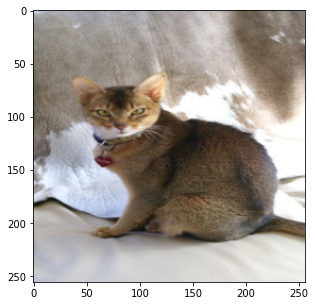

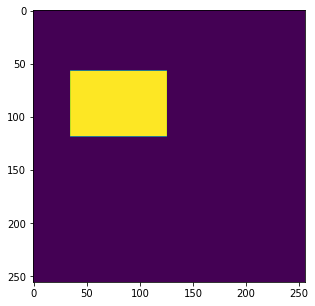

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(samp2[0].astype(np.uint8))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(new[0])

In [38]:
np.sum(a[list(a.keys())[0]][:])/len(a[list(a.keys())[0]][:]) # VAL SET IS ALL DOGS

0.332579185520362

In [43]:
from math import comb

In [44]:
p = np.array([0.13, 0.33, 0.33,0.16,0.04,4.16e-3])

In [45]:
def post(n):
    return 1-(0.95**n)*(0.99**(5-n))

In [46]:
g = [post(i) for i in range(6)]
po = np.array(g)

In [47]:
out = np.zeros(6)
for i in range(6):
    out[i] = po[i]*p[i]

In [48]:
out2 = out/np.sum(out)

In [49]:
print(out)
print(out2)

[0.00637129 0.02885315 0.0410207  0.02554988 0.00774555 0.00094107]
[0.05766834 0.26115786 0.37128971 0.23125905 0.07010714 0.0085179 ]
